<h1>Homework 2 - Due May 8th </h1>

<h4>This homework is going to have problems that requires both analysis and simulation; that is why we are using the Jupyter notebook. Every problem is designed for either emphasizing on part of the materials we learned in class, or extending them. I have also created some sample codes at the end of this document that you may find useful. Enjoy working on the problems! </h4>

<h2>Problem 1:</h2> 
<p>In the class, we have studied the Agreement Protocol for both undirected and directed graphs of $n$ vertices. We have been considering a scalar state for each node so that the concatenated state vector $x$ lies in $\mathbb{R}^n$.
    
<strong>(a):</strong> Now, fix some integer $k\geq 2$. Generalize both the AP dynamics for the case that node $i$ is assigned with a state vector $x_i$ of dimension $k$. Can we write this dynamic compactly using the Kronecker product of matrices? Note that in this case the concatenated state vector of all nodes, denoted by $x = \begin{pmatrix}x_1\\x_2\\ \vdots \\ x_n\end{pmatrix}$, lies in $\mathbb{R}^{nk}$.</p>

<strong>(b):</strong> Do these protocol converge? What is the Necessary and Sufficient conditions for convergence to average consensus in this case for both the undirected and directed graphs?

<strong>(c):</strong> Consider a set of $n$ mobile agent on a 2-d plane who are capable of communicating through the graph $G$ as shown below, and whose position dynamic follows according to $\dot{x}_i(t) = v(t)$ with the velocity vector $v(t) \in \mathbb{R}^2$ to be designed. Design a distributed control for each agent such that they can eventually all meet at some point in $\mathbb{R}^2$ while their position is initialized randomly as $x(0) = \begin{pmatrix}x_1(0)\\x_2(0)\\ \vdots \\ x_n(0)\end{pmatrix}$ below for $i=1,2,...,n$. 

Plot the state trajectories on 2-plane (superimpose for each $i$).

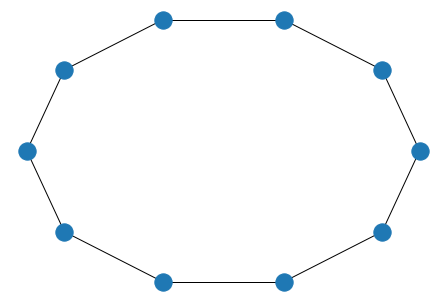

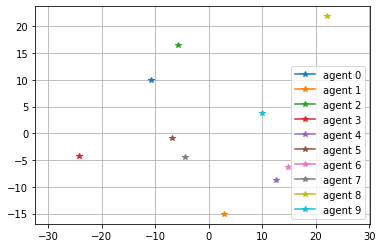

In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(123) 

n = 10 #number of agent
k = 2 #dimension of state vector of one agent
G = nx.cycle_graph(n)
plt.figure(1)
nx.draw_circular(G) 

x_0 = np.zeros((n*k,1)) #concatenated initial states of all mobile agents
plt.figure(2)
plt.grid()
for i in range(n):
    x_0[i*k:(i+1)*k] = np.random.normal(0, 10, size=(k,1))
    plt.plot(x_0[i*k],x_0[i*k+1], marker='*', label=("agent %d" % i))
plt.axis('equal')
plt.legend()

<strong>(d):</strong> Can you predict the convergence point? Verify your answer through simulations. 

<strong>(e):</strong> Remove one of the edges from $G$ and recompute the trajectories. How does the convergence changes? do they converge to the same point? why? how does the convergence rate changes?

<strong>(f):</strong> What if we remove two edges for the original $G$? what are the possibilities? Do they still converge to the same point? if not, why? can you predict the convergence point and rate? verify your answers with simulations. 

<strong>(g):</strong> What happens in the original communication topology if exactly one of the agents refuse to implement the agreement protocol and instead stays stationary? what if it moves at a fix velocity, say, parallel to $x$-axis? Can you explain why? ---we will call such an agent "the leader"!

<strong>(h):</strong> Can you modify the local protocols of these agents so that they meet at any desired point? say at the origin? Explain in math how and verify your answer through simulations. 

<h2>Problem 2:</h2> 
<p>Consider the following digraph $D$, stored in variable D, and implement the Directed Agreement Protocol initialized from a randomly chosen initial condition $x_0 \in \mathbb{R}^n$.</p>

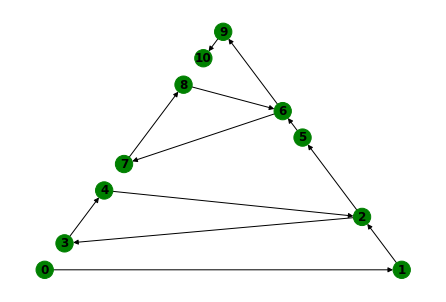

In [2]:
n =12 # number of nodes initially
myD = nx.DiGraph()
myD.add_nodes_from(range(n))
myD.add_edges_from([(i,i+1) for i in range(n)])
myD = nx.contracted_nodes(myD,2,5)
myD = nx.contracted_nodes(myD,7,10)
D = nx.relabel_nodes(myD, dict(zip(sorted(myD), range(len(myD)))))
plt.figure(1)
colored_dict = nx.get_node_attributes(D, 'color')
color_seq = [colored_dict.get(node, 'green') for node in D.nodes()]
nx.draw_planar(D, with_labels=True, font_weight='bold', node_color=color_seq)

<strong> (a): </strong> Does it converge to consensus? Why? Can you predict the convergence point? Is it average consensus? Verify your answer through simulations.


<strong> (b): </strong> Now consider adding a new node and edge to $D$ as follows, stored in variable D_new. Answer part (a) for this new graph.

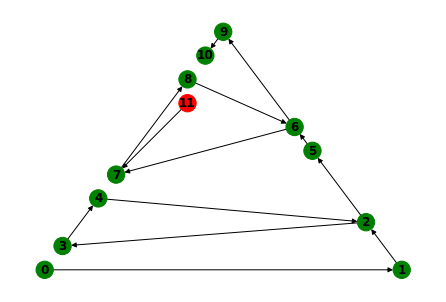

In [3]:
D_new = D
D_new.add_node(11,color='red',style='filled',fillcolor='red')
D_new.add_edge(11,7,color='red')

colored_dict = nx.get_node_attributes(D_new, 'color')
color_seq = [colored_dict.get(node, 'green') for node in D_new.nodes()]
nx.draw_planar(D_new, with_labels=True, font_weight='bold', node_color=color_seq)


<strong> (c):</strong> Can you add exactly two more edges to D_new to guarantee convergence to average consensus, i.e. $\frac{\mathbb{1}'x_0}{n} \mathbb{1}$ where $\mathbb{1}$ denotes the vector of all ones. Verify your answer through simulations.

<strong>(d):</strong> Assign a positive weight to each edge of the original graph $D$ from $(0,1]$ uniformly at random. Implement the Directed Agreement protocol and anwer part (a). 
What if we flip the sign of weights on edges (2,3) and (6,6)?

<h2>Problem 3:</h2> 
<p>Consider the following random undirected graph $G$ of size $n = 30, 40, 60$. Use Agreement Protocol to compute the number of connected components in $G$. Does the initialization of nodes matters in your algroithm? Justify why your algorithm is working.</p>

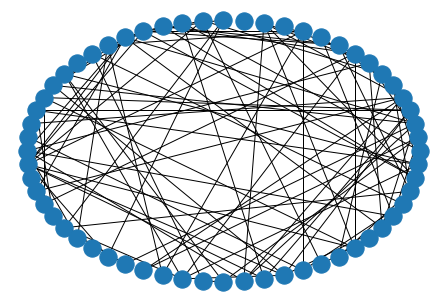

In [4]:
n = 60
G = nx.erdos_renyi_graph(n, 0.06, seed=13)
nx.draw_circular(G)

<h2>Problem 4:</h2> 
<p>Consider the following undirected graphs $G_1$, $G_2$, $G_3$ where their Cartesian product $G = G_1 \square G_2 \square G_3$, is stored in variable G below .</p>
<p><strong> (a):</strong> Simulate the Agreement protocol on each $G_i$ form a random initial condition and verify how it is related to the Agreement protocol on $G$. What should be the initial condition? [hint: use Kronecker product]</p>

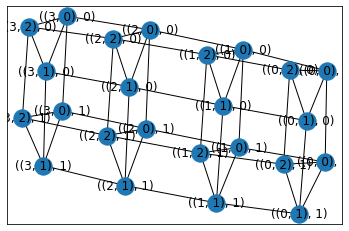

In [13]:
G1 = nx.path_graph(4)
G2 = nx.complete_graph(3)
G3 = nx.path_graph(2)
G = nx.cartesian_product(nx.cartesian_product(G1,G2), G3)
nx.draw_networkx(G)

<p><strong> (b):</strong> Add one edge to $G$ at random. How different are the consensus trajectories? What if we add more edges at random? Plot the normalized average error of all states as a function of time when you added 1, 2, 3, 4 edges at random.</p>

<p><strong> (c):</strong> How does the spectrum of $L(G)$ is changing in part (b).

<h2>Problem 5:</h2> 
<p>Show that a weakly connected and balance digraph is strongly connected.</p>
<p> [Hint: First, show that starting from any point by traversing the edges in the positive direction, one can always get back to the starting point. Second, think about how to combine such two path generated in the first part (if they intersect) to get a subgraph. What are the properties of the resulting combined subgraph? Finally, argue why one can traverse from each one of these subgraphs to any other one.]</p>

<h2>Problem 6:</h2> 
<p>In class, we have seen that the Edge Agreement (or consensus) Protocol over a graph $G$ follows:
    $$\dot{x}_{T}(t) = - L_e(G_{T}) R R^\intercal x_{T}(t)$$
    where $G_{T}$ is a spanning tree for $G$, $x_{T}$ is the edge states corresponding to $G_{T}$, $L_e(G_{T})$ is the edge laplacian of $G_{T}$ and finally, $R=[I~M]$ is the decompotion of incidence matrix such that $D(G) = D(G_{T}) R$. Furthermore, the remainding edge states, denoted by $x_{C}$, can be recovered using the edges in the tree as $x_{C}(t) = M^\intercal x_{T}(t)$.
</p>
<p><strong> (a)</strong> Consider Edge consensus in a tree graph where every edge state is corrupted by an independent zero mean Gaussian noise with identity covariance. Can you modify the above dynamics to reflect this? Simulate the noisy Edge consensus dynamics and investigate its convergence.</p>

<p> <strong> (b)</strong> Repeat part (a) when only one edge of the tree graph is corrupted by such noise. Does it matter where the edge is located in the tree? compare the result when it is connected to a node with nimimum degree versus a node with the maximum degree.</p>

<p> The $\mathcal{H}_2$-norm performance of a system $\dot{x}(t) = Ax(t) + B \omega(t)$ can be calculated by finding $\sqrt{\mathrm{trace}(P)}$ where $P$ solves $AP + P A^\intercal + B B^\intercal = 0$; This norm measures how a Guassian noise $\omega$ is amplified in the states of this system.
    
<p> <strong> (c)</strong> Show that the $\mathcal{H}_2$-norm of the noisy agreement problem over a "tree graph" is proportional to the number of edges in the tree graph. How about a cycle graph? Verify your answer through simulations.</p>


<h2>Problem 7:</h2> 
<p>Consider an undirected cycle graph of $n=30$ nodes, thought of as a communication graph. Here, we will consider the Agreement protocol where some of the "communication edges" fails randomly.
</p>
<p>From Problem 1.(f), you have already gained some intuition as what might happen if one or two edges completely fail (think about the connectivity of the resulting graph). Now, fix some non-negative real numbers $a$ and $b$, and suppose that every $a$ seconds, TWO edges fail at random for $b$ seconds and turns back to normal for the folowing $a$ seconds; and this failure repeats again with another two edges picked uniformly at random. Can you predict if the Agreement Protocol converges or not? why? Does it matter if $b$ is strictly greater than zero or not (i.e. if there are times where the cycle graph remains intact)? Verify your answers by simulating this scenario for different values of $a$ and $b$ relative to the rate of convergence of AP for this graph. Think about your observation in the context of "Lyapunov analysis". </p>

<h1> Sample codes</h1>
The following is just a sample code to show you how to solve a system of ODEs in python. 

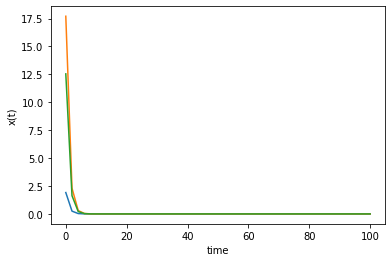

In [6]:
from scipy.integrate import odeint
import matplotlib.pyplot as plt


# function that returns dx/dt = A x 
def model(x,t):
    A = -np.eye(3)
    dxdt = A @ np.array(x).reshape(-1,1)
    return list(dxdt.ravel())

# initial condition
x0 = 20*np.random.rand(3)

# time points
t = np.linspace(0,100)

# solve ODE
x = odeint(model,list(x0),t)

# plot results
plt.plot(t,x)
plt.xlabel('time')
plt.ylabel('x(t)')
plt.show()

Here is how you can get the (undirected) Laplacian of an undirected cycle graph: (note how I've fixed the ordering of the nodes)

In [7]:
G= nx.cycle_graph(3)
L = nx.laplacian_matrix(G, nodelist=sorted(G.nodes()))
L.toarray()

array([[ 2, -1, -1],
       [-1,  2, -1],
       [-1, -1,  2]])